<a href="https://colab.research.google.com/github/roberthouston14/Final_Praxis_Code/blob/main/ETL_Custom_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


The following code checks for duplicate messages between two datasets

In [ ]:
# GOLD: This code compares two datasets for duplicates, prints a pie chart, and shows a df of the duplicates.
import pandas as pd
import matplotlib.pyplot as plt
import os

# Prompt the user to input the file paths for the two datasets
original_file = input("Enter the file path for the original dataset: ")
synthetic_file = input("Enter the file path for the synthetic dataset: ")

# Prompt the user to input the column name containing the text messages
column_name = input("Enter the column name containing the text messages: ")

# Load the two datasets into Pandas dataframes
df_original = pd.read_csv(original_file)
df_synthetic = pd.read_csv(synthetic_file)

# Check if the specified column exists in both dataframes
if column_name not in df_original.columns or column_name not in df_synthetic.columns:
    print(f"The specified column '{column_name}' does not exist in one or both datasets.")
else:
    # Concatenate the two dataframes into a single dataframe
    df_combined = pd.concat([df_original[[column_name]], df_synthetic[[column_name]]], ignore_index=True)

    # Identify duplicates using the `duplicated()` function with `keep=False` to mark all duplicates
    df_combined['duplicate'] = df_combined[column_name].duplicated(keep=False)

    # Print some statistics on the comparison results
    num_duplicates = df_combined['duplicate'].sum()
    num_unique = len(df_combined) - num_duplicates
    print(f"Number of duplicates: {num_duplicates}")
    print(f"Number of unique messages: {num_unique}")

    # Create a dataframe containing the duplicate records
    df_duplicates = df_combined[df_combined['duplicate']]

    # Display the first 10 rows of the duplicates dataframe
    print("\nFirst 10 duplicate records:")
    print(df_duplicates.head(10))

    # Create a pie chart to visualize the comparison results
    labels = ['Unique', 'Duplicate']
    sizes = [num_unique, num_duplicates]
    colors = ['#66b3ff', '#ff9999']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

    # Extract the filenames from the file paths and include them in the chart title
    original_filename = os.path.basename(original_file)
    synthetic_filename = os.path.basename(synthetic_file)
    plt.title(f"Comparison Results\nOriginal: {original_filename}\nSynthetic: {synthetic_filename}")

    plt.show()


In [ ]:
df_duplicates.head(20)

,TEXT,duplicate
928,Get tons of sexy babes or hunks straight to yo...,True
940,. Please CALL 08712402578 immediately as there...,True
997,? Reply or call 08000930705 NOW? Reply or call...,True
1011,wave/wave.asp?o=443303800231. Do not reply by ...,True
1034,your information. Thank you. PAY2TM TEAM.,True
1049,94-stopsms-08718727870150ppm-08718727870150ppm...,True
1085,. Please CALL 08712402578 immediately as there...,True
1092,£1.50 008704050406 SP £1.50 008704050406 SP £1...,True
1154,£1.50 008704050406 SP £1.50 008704050406 SP £1...,True
1166,"T Cs SavaMob POBOX 139, LA3 2WU. Only £1.50/we...",True


The Following Code Checks for Duplicates in a Single file

Enter the file path for the dataset: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Generative Transformer Balanced Datasets/GPT2 Medium/Additional Runs/Dataset_5971_deduped_training - Copy (2)_balanced_data_10149_gpt2-medium_temp1.0_deduped.csv
Enter the column name containing the text messages: TEXT
Number of duplicates: 0
Number of unique messages: 10131


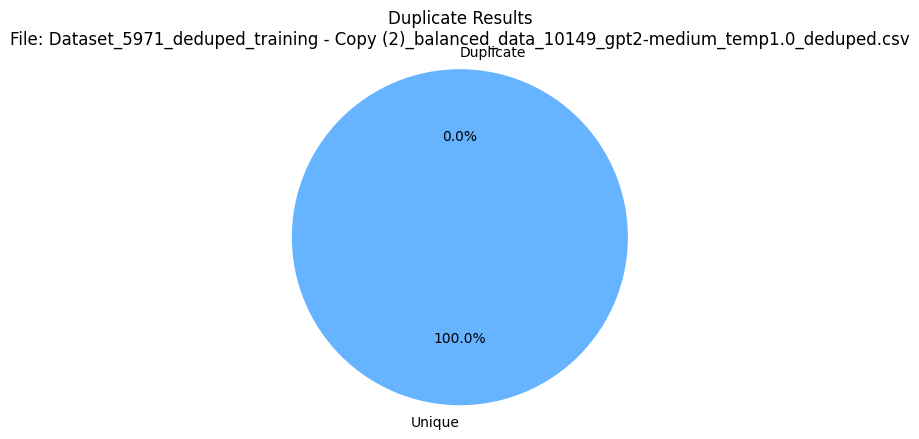


First 10 duplicate records:
Empty DataFrame
Columns: [LABEL, TEXT, URL, EMAIL, PHONE, duplicate]
Index: []


In [ ]:
# GOLD: The Following Code Checks for Duplicates in a Single file and shows a df of the duplicates
import pandas as pd
import matplotlib.pyplot as plt
import os

# Prompt the user to input the file path for the dataset
file_path = input("Enter the file path for the dataset: ")

# Prompt the user to input the column name containing the text messages
column_name = input("Enter the column name containing the text messages: ")

# Load the dataset into a Pandas dataframe
df = pd.read_csv(file_path)

# Check if the specified column exists in the dataframe
if column_name not in df.columns:
    print(f"The specified column '{column_name}' does not exist in the dataset.")
else:
    # Identify duplicates using the `duplicated()` function with `keep=False` to mark all duplicates
    df['duplicate'] = df[column_name].duplicated(keep=False)

    # Print some statistics on the duplicate results
    num_duplicates = df['duplicate'].sum()
    num_unique = len(df) - num_duplicates
    print(f"Number of duplicates: {num_duplicates}")
    print(f"Number of unique messages: {num_unique}")

    # Create a pie chart to visualize the duplicate results
    labels = ['Unique', 'Duplicate']
    sizes = [num_unique, num_duplicates]
    colors = ['#66b3ff', '#ff9999']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

    # Extract the filename from the file path and include it in the chart title
    filename = os.path.basename(file_path)
    plt.title(f"Duplicate Results\nFile: {filename}")

    plt.show()

    # Display the first 10 rows of the duplicates dataframe
    print("\nFirst 10 duplicate records:")
    df_duplicates = df[df['duplicate']]
    print(df_duplicates.head(10))


Enter the file path for the dataset: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Generative Transformer Balanced Datasets/GPT2/word frequency version/Dataset_5971_deduped_training - Copy_balanced_data_10149_gpt2_temp1.0_deduped_nans_dropped.csv
Enter the column name containing the text messages: TEXT
Number of NaNs in the 'TEXT' column: 0
Number of duplicates: 0
Number of unique messages: 10130


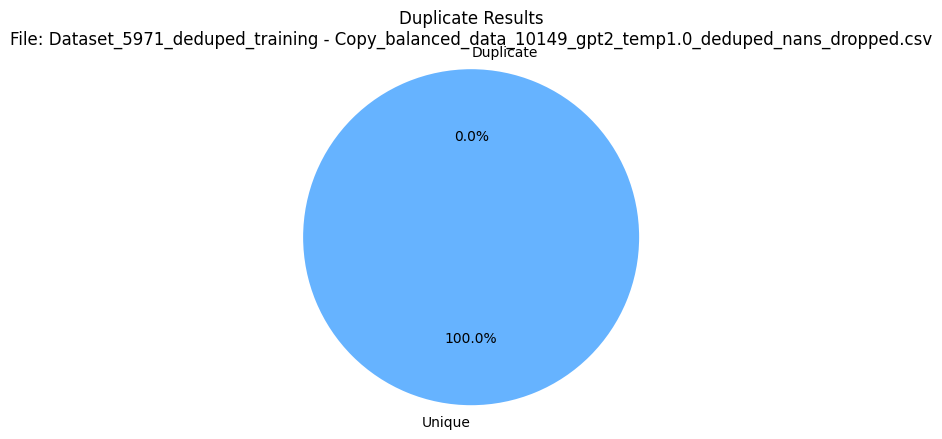


First 10 duplicate records:
Empty DataFrame
Columns: [LABEL, TEXT, URL, EMAIL, PHONE, duplicate]
Index: []


In [4]:
# GOLD: The Following Code Checks for Duplicates in a Single file and shows a df of the duplicates AND the number of NANs Drops NANS and saves cleaned dataset
import pandas as pd
import matplotlib.pyplot as plt
import os

# Prompt the user to input the file path for the dataset
file_path = input("Enter the file path for the dataset: ")

# Prompt the user to input the column name containing the text messages
column_name = input("Enter the column name containing the text messages: ")

# Load the dataset into a Pandas dataframe
df = pd.read_csv(file_path)

# Count NaNs in the specified column
nan_count = df[column_name].isna().sum()
print(f"Number of NaNs in the '{column_name}' column: {nan_count}")

# If there are NaNs in the specified column, drop them and save the updated DataFrame to the original file
if nan_count > 0:
    df.dropna(subset=[column_name], inplace=True)
    df.to_csv(file_path, index=False)
    print("Dropped NaNs and saved the updated DataFrame to the original file.")

# Check if the specified column exists in the dataframe
if column_name not in df.columns:
    print(f"The specified column '{column_name}' does not exist in the dataset.")
else:
    # Identify duplicates using the `duplicated()` function with `keep=False` to mark all duplicates
    df['duplicate'] = df[column_name].duplicated(keep=False)

    # Print some statistics on the duplicate results
    num_duplicates = df['duplicate'].sum()
    num_unique = len(df) - num_duplicates
    print(f"Number of duplicates: {num_duplicates}")
    print(f"Number of unique messages: {num_unique}")

    # Create a pie chart to visualize the duplicate results
    labels = ['Unique', 'Duplicate']
    sizes = [num_unique, num_duplicates]
    colors = ['#66b3ff', '#ff9999']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

    # Extract the filename from the file path and include it in the chart title
    filename = os.path.basename(file_path)
    plt.title(f"Duplicate Results\nFile: {filename}")

    plt.show()

    # Display the first 10 rows of the duplicates dataframe
    print("\nFirst 10 duplicate records:")
    df_duplicates = df[df['duplicate']]
    print(df_duplicates.head(10))


The following code DeDupes the dataset and saves in a file appended with _dedupe

In [ ]:
# GOLD: The following code DeDupes the dataset and saves in a file appended with _dedupe
import pandas as pd
import matplotlib.pyplot as plt
import os

# Prompt the user to input the file path for the dataset
file_path = input("Enter the file path for the dataset: ")

# Prompt the user to input the column name containing the text messages
column_name = input("Enter the column name containing the text messages: ")

# Load the dataset into a Pandas dataframe
df = pd.read_csv(file_path)

# Check if the specified column exists in the dataframe
if column_name not in df.columns:
    print(f"The specified column '{column_name}' does not exist in the dataset.")
else:
    # Identify duplicates using the `duplicated()` function with `keep='first'` to keep only the first occurrence
    df['duplicate'] = df[column_name].duplicated(keep='first')

    # Print some statistics on the duplicate results
    num_duplicates = df['duplicate'].sum()
    num_unique = len(df) - num_duplicates
    print(f"Number of duplicates: {num_duplicates}")
    print(f"Number of unique messages: {num_unique}")

    # Drop duplicate rows from the dataframe
    df_deduplicated = df.drop(df[df['duplicate']].index)

    # Save the deduplicated dataframe to a new file with the same name as the original file, appended with "_deduped"
    file_dir, file_name = os.path.split(file_path)
    file_base, file_ext = os.path.splitext(file_name)
    deduplicated_file_name = f"{file_base}_deduped{file_ext}"
    deduplicated_file_path = os.path.join(file_dir, deduplicated_file_name)

    df_deduplicated.to_csv(deduplicated_file_path, index=False)
    print(f"Deduplicated dataset saved to: {deduplicated_file_path}")


Enter the file path for the dataset: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Generative Transformer Balanced Datasets/GPT2 Medium/Additional Runs/Dataset_5971_deduped_training - Copy (2)_balanced_data_10149_gpt2-medium_temp1.0.csv
Enter the column name containing the text messages: TEXT
Number of duplicates: 18
Number of unique messages: 10131
Deduplicated dataset saved to: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Generative Transformer Balanced Datasets/GPT2 Medium/Additional Runs/Dataset_5971_deduped_training - Copy (2)_balanced_data_10149_gpt2-medium_temp1.0_deduped.csv


Enter the file path for the original dataset: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Dataset_5971_deduped_training_synthetic_data_5985_gpt2_temp0.2.csv
Enter the file path for the synthetic dataset: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Dataset_5971_deduped_training_synthetic_data_5985_gpt2_temp0.5.csv
Enter the column name containing the text messages: TEXT
Number of duplicates: 19
Number of unique messages: 11949

First 10 duplicate records:
                                                   TEXT  duplicate
117                                                 NaN       True
1825                                                NaN       True
2277                                                NaN       True
2854                                                NaN       True
3643  Arsenal 4 (Henry, 7 v Liverpool 2 Henry scores...       True
4009  Arsenal 4 (He

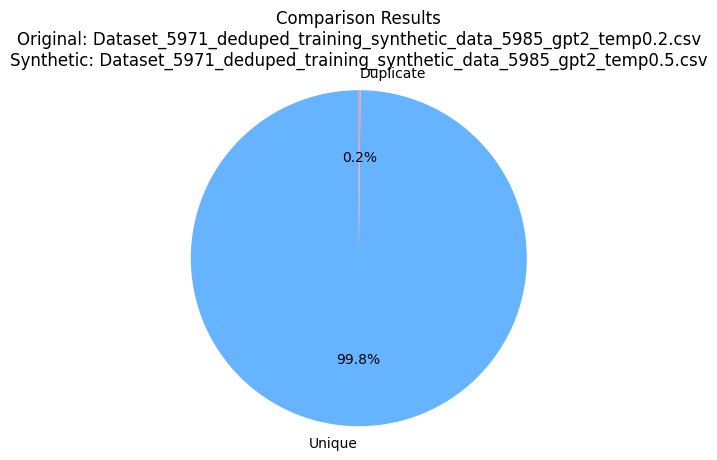

In [ ]:
# GOLD: This code compares two datasets for duplicates, prints a pie chart, and shows a df of the duplicates.
import pandas as pd
import matplotlib.pyplot as plt
import os

# Prompt the user to input the file paths for the two datasets
original_file = input("Enter the file path for the original dataset: ")
synthetic_file = input("Enter the file path for the synthetic dataset: ")

# Prompt the user to input the column name containing the text messages
column_name = input("Enter the column name containing the text messages: ")

# Load the two datasets into Pandas dataframes
df_original = pd.read_csv(original_file)
df_synthetic = pd.read_csv(synthetic_file)

# Check if the specified column exists in both dataframes
if column_name not in df_original.columns or column_name not in df_synthetic.columns:
    print(f"The specified column '{column_name}' does not exist in one or both datasets.")
else:
    # Concatenate the two dataframes into a single dataframe
    df_combined = pd.concat([df_original[[column_name]], df_synthetic[[column_name]]], ignore_index=True)

    # Identify duplicates using the `duplicated()` function with `keep=False` to mark all duplicates
    df_combined['duplicate'] = df_combined[column_name].duplicated(keep=False)

    # Print some statistics on the comparison results
    num_duplicates = df_combined['duplicate'].sum()
    num_unique = len(df_combined) - num_duplicates
    print(f"Number of duplicates: {num_duplicates}")
    print(f"Number of unique messages: {num_unique}")

    # Create a dataframe containing the duplicate records
    df_duplicates = df_combined[df_combined['duplicate']]

    # Display the first 10 rows of the duplicates dataframe
    print("\nFirst 10 duplicate records:")
    print(df_duplicates.head(10))

    # Create a pie chart to visualize the comparison results
    labels = ['Unique', 'Duplicate']
    sizes = [num_unique, num_duplicates]
    colors = ['#66b3ff', '#ff9999']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

    # Extract the filenames from the file paths and include them in the chart title
    original_filename = os.path.basename(original_file)
    synthetic_filename = os.path.basename(synthetic_file)
    plt.title(f"Comparison Results\nOriginal: {original_filename}\nSynthetic: {synthetic_filename}")

    plt.show()


In [ ]:
# This code combines two datasets and drops duplicate texts
import pandas as pd
import matplotlib.pyplot as plt
import os

# Prompt the user to input the file paths for the two datasets
file_1 = input("Enter the file path for file 1: ")
file_2 = input("Enter the file path for file 2: ")

# Prompt the user to input the column name containing the text messages
column_name = input("Enter the column name containing the text messages: ")

# Load the two datasets into Pandas dataframes
df_file_1 = pd.read_csv(file_1)
df_file_2 = pd.read_csv(file_2)

# Check if the specified column exists in both dataframes
if column_name not in df_file_1.columns or column_name not in df_file_2.columns:
    print(f"The specified column '{column_name}' does not exist in one or both datasets.")
else:
    # Concatenate the two dataframes into a single dataframe and remove duplicates
    df_combined = pd.concat([df_file_1, df_file_2], ignore_index=True).drop_duplicates(subset=column_name)

    # Prompt the user for the destination directory to save the combined dataframe
    save_directory = input("Enter the destination directory to save the new dataset: ")

    # Create the directory if it does not exist
    os.makedirs(save_directory, exist_ok=True)

    combined_filename = f"{os.path.splitext(os.path.basename(file_1))[0]}_{os.path.splitext(os.path.basename(file_2))[0]}_Mixed.csv"
    df_combined.to_csv(os.path.join(save_directory, combined_filename), index=False)
    print(f"Combined dataset saved to: {os.path.join(save_directory, combined_filename)}")


Enter the file path for file 1: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Data Augmentation Data Balancer/Dataset_5971_deduped_training_balanced_data_augmented_10149.csv
Enter the file path for file 2: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Generative Transformer Balanced Datasets/GPT2 Large/Dataset_5971_deduped_training_balanced_data_10149_gpt2-large_temp0.5.csv
Enter the column name containing the text messages: TEXT
Enter the destination directory to save the new dataset: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Smished Datasets
Combined dataset saved to: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Smished Datasets/Dataset_5971_deduped_training_balanced_data_augmented_10149_Dataset_5971_deduped_training_balanced_data_10149_gpt2-large_tem

In [5]:
# GOLD: The following code DeDupes the dataset, drops all rows with NaN in the text column, and saves in a file appended with _deduped_nans_dropped
import pandas as pd
import matplotlib.pyplot as plt
import os

# Prompt the user to input the file path for the dataset
file_path = input("Enter the file path for the dataset: ")

# Prompt the user to input the column name containing the text messages
column_name = input("Enter the column name containing the text messages: ")

# Load the dataset into a Pandas dataframe
df = pd.read_csv(file_path)

# Check if the specified column exists in the dataframe
if column_name not in df.columns:
    print(f"The specified column '{column_name}' does not exist in the dataset.")
else:
    # Drop rows where the text column is NaN
    df = df.dropna(subset=[column_name])

    # Identify duplicates using the `duplicated()` function with `keep='first'` to keep only the first occurrence
    df['duplicate'] = df[column_name].duplicated(keep='first')

    # Print some statistics on the duplicate results
    num_duplicates = df['duplicate'].sum()
    num_unique = len(df) - num_duplicates
    print(f"Number of duplicates: {num_duplicates}")
    print(f"Number of unique messages: {num_unique}")

    # Drop duplicate rows from the dataframe
    df_deduplicated = df.drop(df[df['duplicate']].index)

    # Save the deduplicated and NaN-dropped dataframe to a new file
    # The filename is appended with "_deduped_nans_dropped"
    file_dir, file_name = os.path.split(file_path)
    file_base, file_ext = os.path.splitext(file_name)
    deduplicated_file_name = f"{file_base}_deduped_nans_dropped{file_ext}"
    deduplicated_file_path = os.path.join(file_dir, deduplicated_file_name)

    df_deduplicated.to_csv(deduplicated_file_path, index=False)
    print(f"Deduplicated and NaN-dropped dataset saved to: {deduplicated_file_path}")



Enter the file path for the dataset: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Generative Transformer Balanced Datasets/GPT2/word frequency version/Dataset_5971_deduped_training - Copy_balanced_data_10149_gpt2_temp0.5.csv
Enter the column name containing the text messages: TEXT
Number of duplicates: 2622
Number of unique messages: 7362
Deduplicated and NaN-dropped dataset saved to: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Generative Transformer Balanced Datasets/GPT2/word frequency version/Dataset_5971_deduped_training - Copy_balanced_data_10149_gpt2_temp0.5_deduped_nans_dropped.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# GOLD: The Following Code Checks for Duplicates in a Single file, shows a df of the duplicates,
# AND the number of NANs, Drops NANS, and prepares the text column for training with TF-IDF embeddings.
# It then saves the cleaned and prepared dataset.

# Prompt the user to input the file path for the dataset
file_path = input("Enter the file path for the dataset: ")

# Prompt the user to input the column name containing the text messages
column_name = input("Enter the column name containing the text messages: ")

# Load the dataset into a Pandas dataframe
df = pd.read_csv(file_path)

# Count NaNs in the specified column
nan_count = df[column_name].isna().sum()
print(f"Number of NaNs in the '{column_name}' column: {nan_count}")

# If there are NaNs in the specified column, drop them
if nan_count > 0:
    df.dropna(subset=[column_name], inplace=True)
    print("Dropped NaNs.")

# Check if the specified column exists in the dataframe
if column_name not in df.columns:
    print(f"The specified column '{column_name}' does not exist in the dataset.")
else:
    # Text cleaning: convert to lower case and remove punctuations
    df[column_name] = df[column_name].apply(lambda x: x.lower())
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^\w\s]', '', x))

    # Identify duplicates using the `duplicated()` function with `keep=False` to mark all duplicates
    df['duplicate'] = df[column_name].duplicated(keep=False)

    # Print some statistics on the duplicate results
    num_duplicates = df['duplicate'].sum()
    num_unique = len(df) - num_duplicates
    print(f"Number of duplicates: {num_duplicates}")
    print(f"Number of unique messages: {num_unique}")

    # TF-IDF Vectorization (optional here, but usually this step is done after train/test split)
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(df[column_name])

    # Save the deduplicated and cleaned dataframe to a new file with the same name as the original file,
    # appended with "_cleaned_prepared"
    file_dir, file_name = os.path.split(file_path)
    file_base, file_ext = os.path.splitext(file_name)
    cleaned_file_name = f"{file_base}_cleaned_prepared{file_ext}"
    cleaned_file_path = os.path.join(file_dir, cleaned_file_name)

    df.to_csv(cleaned_file_path, index=False)
    print(f"Cleaned and prepared dataset saved to: {cleaned_file_path}")


Enter the file path for the dataset: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Dataset_5971_deduped_training - Copy (2)_balanced_data_10149_gpt2_temp1.5_deduped_nans_dropped.csv
Enter the column name containing the text messages: TEXT
Number of NaNs in the 'TEXT' column: 0
Number of duplicates: 4
Number of unique messages: 10135
Cleaned and prepared dataset saved to: /content/drive/MyDrive/Production Datasets/1_Praxis_Dataset/DeDuped_Dataset/Split Dataset/Training Data/Dataset_5971_deduped_training - Copy (2)_balanced_data_10149_gpt2_temp1.5_deduped_nans_dropped_cleaned_prepared.csv
